# 2. Modelos de distribución multivariados
## 2.1. Funciones de distribución y densidad

<p align="right">
Autor: Emmanuel Alcalá
<br>
<a href="https://scholar.google.com.mx/citations?hl=en&user=3URusCgAAAAJ&view_op=list_works&sortby=pubdate">Google Scholar</a>
</p>

<p align="left">
<br>
<a href="https://jealcalat.github.io/Analisis_multivariado/">Regresar a la página del curso</a>
</p>

---


## 2.0. Preliminares

Referencia: [Capítulo 6 de Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)

---

### Variables aleatorias

Suponer que $X$ representa una cantidad desconocida de interés, como la temperatura de una máquina. Si los valores de $X$ son desconocidos o cambian, decimos que $X$ es una variable aleatoria, o **VA**. El conjunto de todos los valores *posibles* se denota como $\mathcal{X}$, llamado espacio muestral o espacio de estados. Un evento es un *sub*conjunto de valores del espacio muestral. Por ejemplo, si $\mathcal{X}$ es el lado de un dado al ser lanzado, $\mathcal{X} = \{ 1, 2, 3, 4, 5, 6 \}$, el evento "cae 1" se denota $X = 1$, y "ver un número impar" se denota $X \in \{ 1, 3, 4\}$, el evento "cae entre 4 y 6" como $4 \leq X \leq 6$.

**Nota**: no confundir el espacio muestral $\mathcal{X}$ con la VA $X$. En el segundo caso, la VA toma valores numéricos, es una función de los elementos de $\mathcal{X}$ que mapea de $\mathcal{X}$ al conjunto de los reales o naturales. $\mathcal{X}$ puede o no consistir en valores numéricos. Por ejemplo, si  el espacio muestral $\mathcal{X}$ son los posibles resultados de lanzar dos monedas tenemos $\mathcal{X}=\{HH, HT, TT\}$. Al evento "cantidad de veces que sale caras, o $H$", la variable $X$ mapea de $\mathcal{X}$ tres posibles resultados: $X(HH)=2, X(HT)=1, H(TT)=0$.

---

#### VA discretas

Si $\mathcal{X}$ es finito o contable infinito (cada miembro de $\mathcal{X}$ puede asociarse con un elemento de $\mathbb{N}$), entonces $X$ es una variable aleatoria *discreta*. En este caso, denotamos la probabilidad de un evento que $X$ toma como $\text{Pr}(X=x)$. Definimos la **función de masa de probabilidad** ($\text{\sf pmf}$ en inglés) como la función que computa la probabilidad de cada valor de la VA

$$
  p(x) \overset{\Delta}{=} \text{Pr}(X = x)
$$

$p(x)$ satisface $0\leq p(x) \leq 1$ y $\sum_{x\in \mathcal{X}} p(x) = 1$. 

Podemos imaginarnos la distribución de probabilidad de muchas variables aleatorias como el llenado de un arreglo multidimensional. Por ejemplo, en la siguiente imagen (MML-6.2)

<p align="center">
  <img src="img/rv_array.png" width='40%' />
</p>

muestra dos variables aleatorias bivariadas, $X$ (que puede tomar valores $x_i, i = 1, 2, \dots, M$) y $Y$ (que puede tomar valores $j=1, 2, \dots, L$). La probabilidad (*conjunta*) de que $X=x, Y=y$ se define como

$$
  p(x, y) \overset{\Delta}{=} \text{Pr}(X = x, Y = y)
$$

$p(x, y)$ se lee "la probabilidad de $x$ y $y$", en ocasiones escrito usando notación de teoría de conjuntos como $p(x \cap y)$. Cada entrada (cada celda) en la tabla se calcula contando la cantidad de casos que $(x_i,y_j)$ suceden conjuntamente

$$
\text{Pr}(X = x_i, Y = y_i) = \frac{n_{ij}}{N} \tag{1}
$$

En la tabla, si contamos todos los casos de la fila $j$ tenemos la cantidad total de veces que $y_j$ sucede, y lo llamamos $r_j$. Si contamos la columna $i$ tenemos la cantidad total de veces que $x_i$ sucede, y que llamamos $c_i$.

La *probabilidad marginal* de $x$, es decir, la probabilidad que $X=x$ sin importar el valor de $Y$ se escribe como $p(x)$ y se calcula como sigue

$$
  p(X = x_i) = p(x_i) = \frac{c_i}{N}
$$

El número de casos en la columna $i$ es la suma de casos en cada celda *en esa columna*, por lo que $c_i = \sum_j n_{ij}$ (dejando fija $i$). Por lo tanto, 

$$
  p(x_i) = \sum_{j=i}^Lp(x_i, y_j) \tag{2}
$$

A la ecuación (1) se le conoce como la regla de la suma. Notar que se fija la columna $i$ y se itera sobre las filas $j=1, 2, 3$, por lo que por cada columna $i$ tenemos una probabilidad $p(x_i)$.

Si consideramos los casos en los que $X=x_i$, la *fracción* de casos en los que $Y=y_j$ se escribe como $p(Y=y_j | X=x_i)$, probabilidad que es conocida como *probabilidad condicional* de $Y=yj$ *dado* que $X=x_i$. Se obtiene encontrando la fracción de puntos en una columna $i$ que caen en una celda $(i,j)$ dada

$$
  p(y_j | x_i) = \frac{n_{ij}}{c_i} \tag{3}
$$

Notar que $c_i$ es la cantidad total de valores para los cuales $X=x_i$, y $n_{ij}$ es una celda particular. Con las ecuaciones (1), (2) y (3) podemos derivar la siguiente relación:

$$
  \begin{align*}
    p(x_i, y_i) &=  \frac{n_{ij}}{N} =  \frac{n_{ij}}{c_i} \frac{c_i}{N}\\
                &= p(y_j | x_i)p(x_i) \tag{4}
  \end{align*}
$$

La ecuación (4) es conocida como *regla del producto*.

Eliminando la notación excesiva, podemos sintetizar las dos reglas como sigue

$$
  \begin{align*}
    \text{\bf regla de la suma}\quad\quad   &p(x) = \sum_{y}p(x,y) \\
    \text{\bf regla del producto}\quad\quad &p(x, y) = p(y|x)p(x) 
  \end{align*}
$$

Considerando la simetría $p(x,y) = p(y,x)$ y que $p(y,x) = p(x|y)p(y)$, encontramos la siguiente relación

$$
 \begin{align*}
  p(y|x)p(x) &=  p(x|y)p(y)\\
  p(y|x)     &=  \frac{ p(x|y)p(y)}{p(x)}
 \end{align*} \tag{5}
$$

La ecuación (5) es llamada *Teorema de Bayes*, y tiene una importancia en ML y estadística que no puede ser exagerada. 

---

#### VA continuas

Si $X\in \mathbb{R}$ es una función real, se denomina *variable aleatoria continua*, y es más natural especificar que $X$ se encuentre en un intervalo, e.g,, $a \leq X \leq b$, dado que en este caso no se puede crear un conjunto *contable* de valores posibles que $X$ puede tomar, pero podemos crear un conjunto finito de *intervalos* en la linea real, y asociar los eventos de $X$ que están en esos intervalos.

##### Distribución acumulada (cdf)

Sea $A = (X \leq a)$, $B = (X \leq b)$ y $C = (a < X \leq b)$ en donde $a < b$. Tenemos que $B$ es la unión de $A$ y $C$, es decir, $B$ toma todos los valores que toman $A$ y $C$. Dado que $A$ y $C$ son mutuamente excluyentes, la probabilidad de $B$ es

$$\text{Pr}(B) = \text{Pr}(A) + \text{Pr}(C)$$

Y la probabilidad de estar en el intervalo $C$ como

$$\text{Pr}(C) = \text{Pr}(B) - \text{Pr}(A)$$

Definimos la distribución de probabilidad acumulada como 

$$
   P(x) \overset{\Delta}{=} \text{Pr}(X \leq x)
$$

Con esto, podemos calcular la probabilidad de estar en un intervalo como

$$
  \text{Pr}(a < X \leq b) = P(b) - P(a)
$$

En el siguiente gráfico se representa la función de probabilidad acumulada normal. 

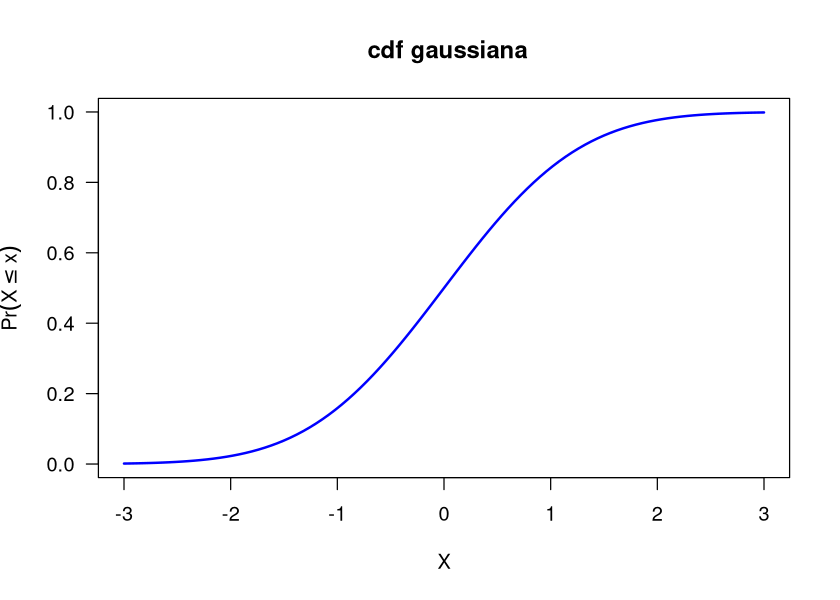

In [18]:
par(las=1)
options(repr.plot.width=7, repr.plot.height=5)
curve(
  pnorm(x, mean = 0, sd = 1),
  from = -3, to = 3, main = " cdf gaussiana",
  xlab = 'X', ylab = expression(Pr(X <= x)),
  col = 'blue', lwd = 2
)

##### Función de densidad

Podemos definir la función de densidad de probabilidad, o *pdf*, como la derivada de la cdf

$$
  p(x) \overset{\Delta}{=} \frac{d}{dx}P(x)
$$

Dada la *pdf*, podemos calcular la probabilidad de una variable continua en un intervalo finito como sigue

$$
  \text{Pr}(a <X\leq b) = \int_a^b p(x)dx = P(b) - P(a)
$$



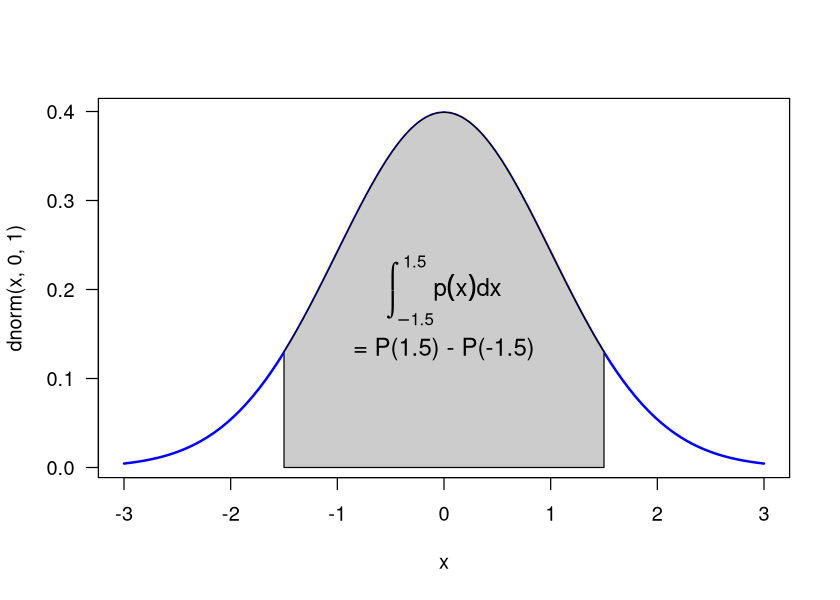

In [37]:
par(las = 1)
curve(
  dnorm(x, 0, 1),
  from = -3, to = 3,
  col = "blue",
  lwd = 2
)
from_x <- -1.5
to_x <- 1.5
sx  <- c(from_x, seq(from_x, to_x, 0.01), to_x)
sy  <- c(0, dnorm(seq(from_x, to_x, 0.01)), 0)
polygon(
  sx, sy,
  col = grey(0.8)
)
text(
  x = 0,
  y = dnorm(0, 0) / 2,
  labels = expression(integral(p(x) * dx, -1.5, 1.5)),
  cex = 1.2
)
text(
  x = 0,
  y = dnorm(0, 0)/3,
  labels = '= P(1.5) - P(-1.5)',
  cex = 1.2
)

In [39]:
pnorm(1.5) - pnorm(-1.5)

[1] 0.8663856